# Amazon Products and Reviews Analysis

This notebook analyzes Amazon product data to understand pricing,
discount patterns, ratings, and customer review behavior.


## Import Required Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")



## Load the Dataset

The dataset is loaded from the Kaggle input directory.


In [2]:
df = pd.read_csv("/kaggle/input/amazon-sales-dataset/amazon.csv")



## Dataset Overview

Let us understand the structure of the dataset including rows, columns,
data types and initial records.


In [3]:
df.head()


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Dataset Overview


In [4]:
df.shape


(1465, 16)

In [5]:
df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## Missing Value Check

Checking if the dataset contains any missing or null values.


In [7]:
df.isnull().sum()


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [8]:
df = df.dropna()


## Data Cleaning

Converting price columns from string to numeric format.



In [9]:
# Clean discounted_price
df['discounted_price'] = (
    df['discounted_price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Clean actual_price
df['actual_price'] = (
    df['actual_price']
    .astype(str)
    .str.replace('₹', '', regex=False)
    .str.replace(',', '', regex=False)
    .astype(float)
)

# Clean discount_percentage
df['discount_percentage'] = (
    df['discount_percentage']
    .astype(str)
    .str.replace('%', '', regex=False)
    .astype(float)
)



## Descriptive Statistics


In [10]:
df.describe()


,discounted_price,actual_price,discount_percentage
count,1463.000000,1463.000000,1463.000000
mean,3129.277122,5451.068544,47.650718
std,6948.222850,10881.018448,21.622373
min,39.000000,39.000000,0.000000
25%,325.000000,800.000000,32.000000
50%,799.000000,1690.000000,50.000000
75%,1999.000000,4312.500000,63.000000
max,77990.000000,139900.000000,94.000000


## Products by Category


In [11]:
category_count = df['category'].value_counts()
category_count


category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                          231
Electronics|WearableTechnology|SmartWatches                                                                                 76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones                                                        68
Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions                                                               63
Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear                                                                52
                                                                                                                          ... 
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|RotiMakers                                                        1
Home&Kitchen|Heating,Cooling&AirQuality|Parts&Accessories|FanParts&Accessories                        

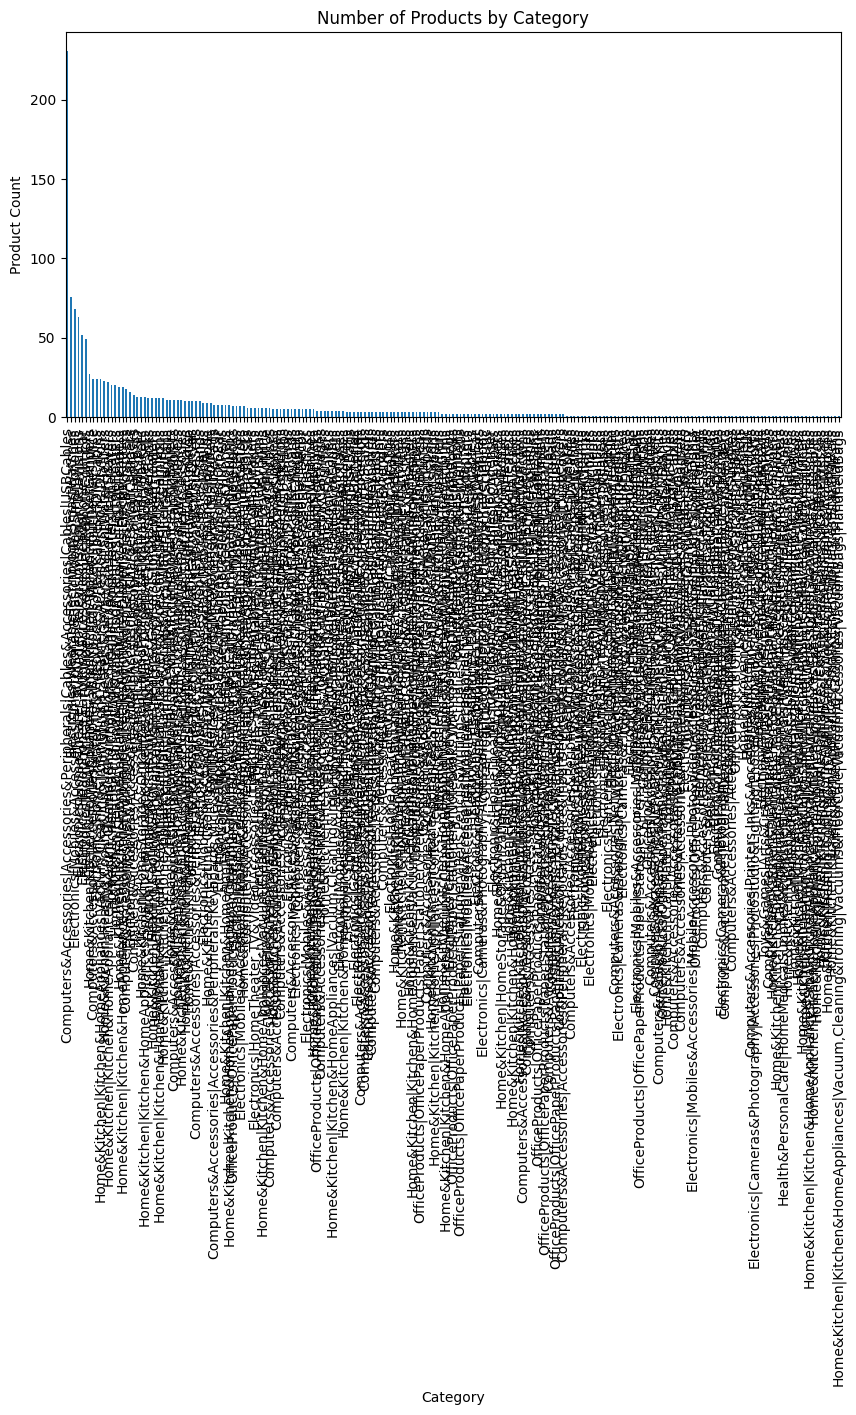

In [12]:
plt.figure(figsize=(10,5))
category_count.plot(kind='bar')
plt.title("Number of Products by Category")
plt.xlabel("Category")
plt.ylabel("Product Count")
plt.show()


## Average Rating by Category


In [13]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')


In [14]:
df = df.dropna(subset=['rating'])


In [15]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

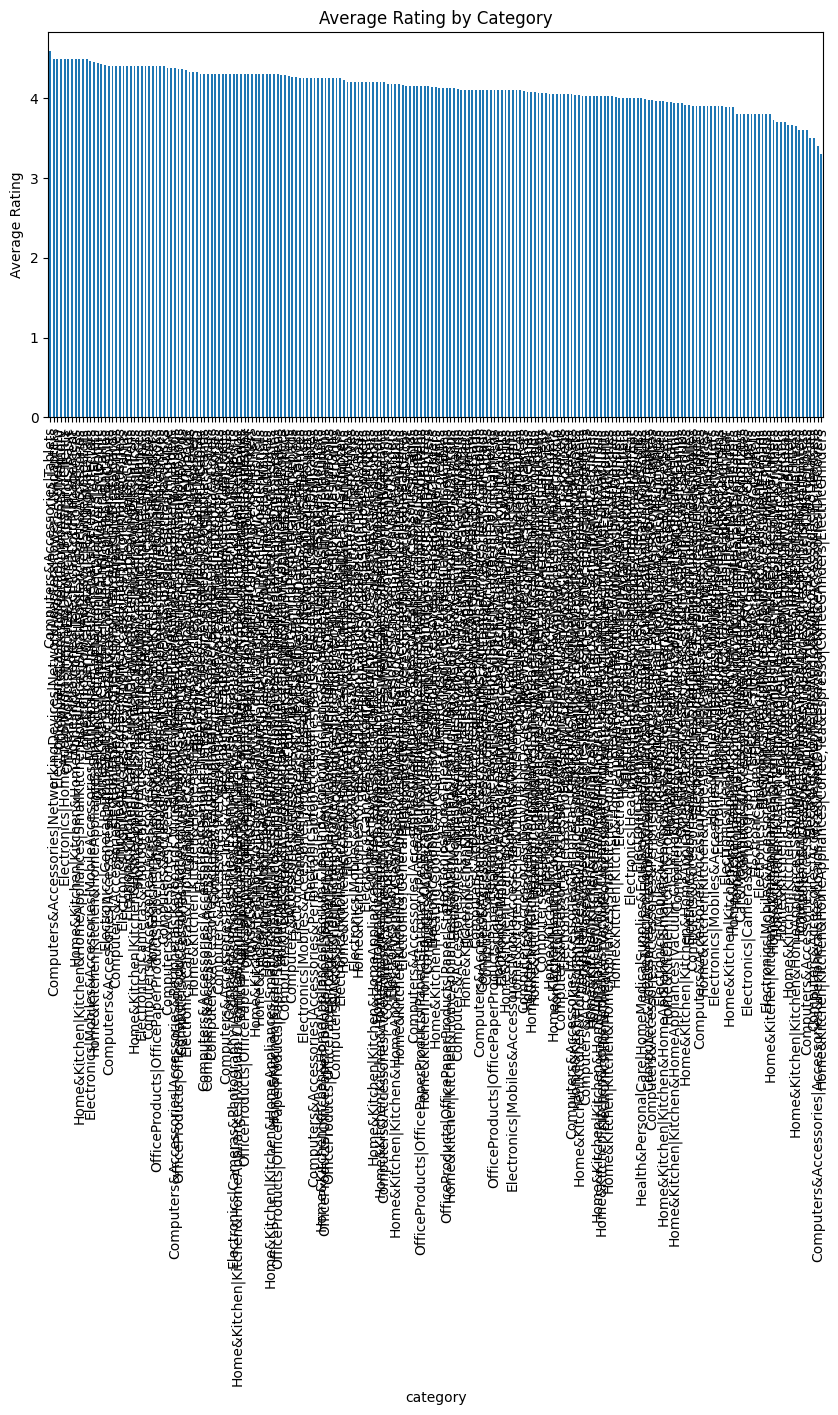

In [16]:
plt.figure(figsize=(10,5))
avg_rating.plot(kind='bar')
plt.title("Average Rating by Category")
plt.ylabel("Average Rating")
plt.show()


## Average Rating by Category


In [17]:
avg_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)
avg_rating


category
Computers&Accessories|Tablets                                                                                    4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                         4.5
Electronics|Cameras&Photography|Accessories|Film                                                                 4.5
Computers&Accessories|Components|Memory                                                                          4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                     4.5
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                               3.6
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                           3.5
Computers&Accessories|Accessories&Peripherals|Audio&Vid

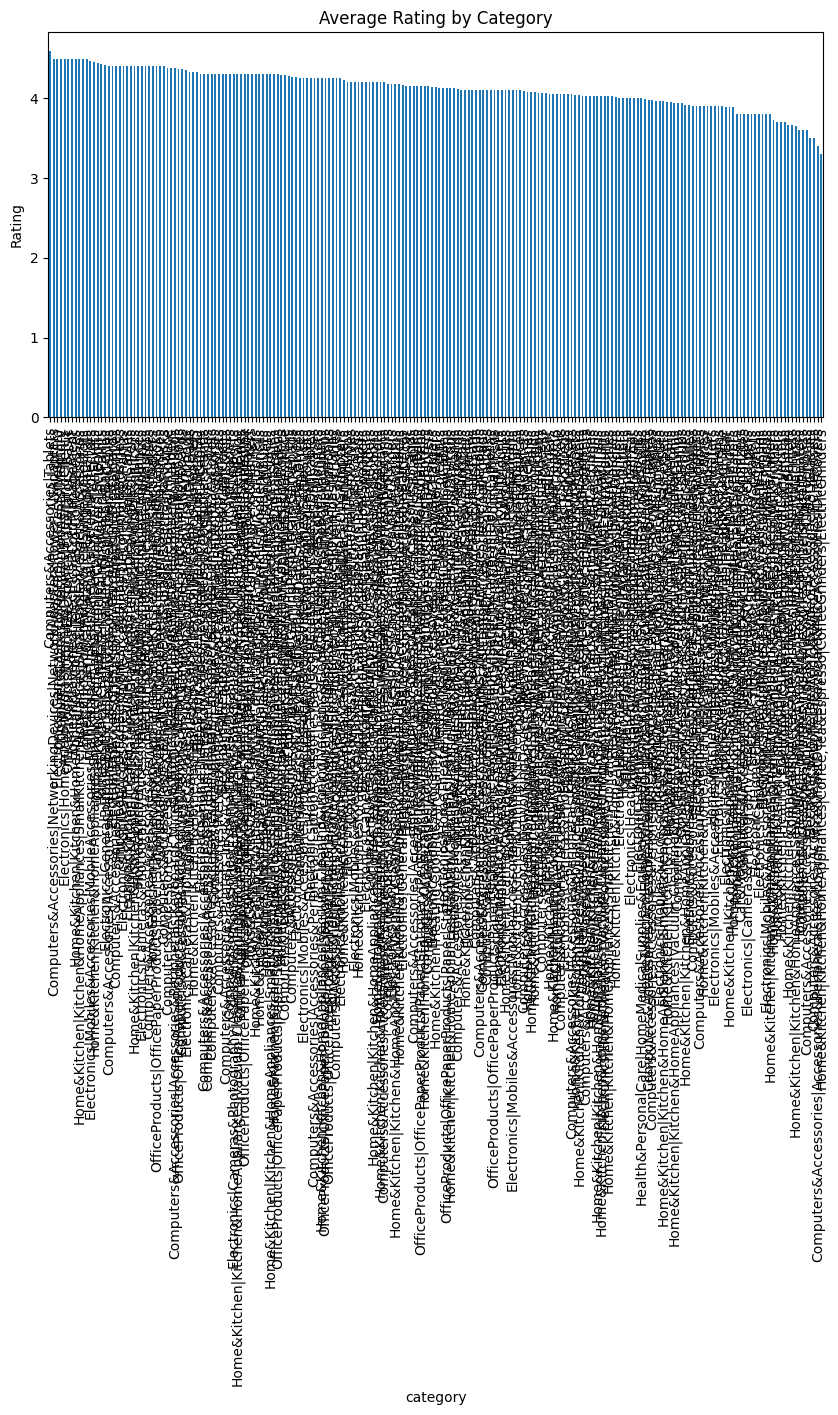

In [18]:
plt.figure(figsize=(10,5))
avg_rating.plot(kind='bar')
plt.title("Average Rating by Category")
plt.ylabel("Rating")
plt.show()


## Discount vs Rating Analysis


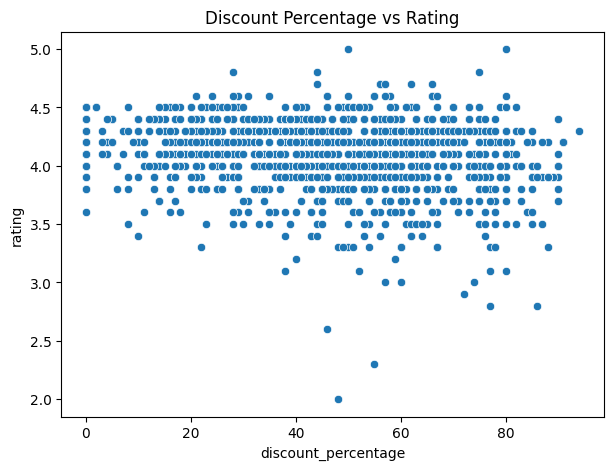

In [19]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='discount_percentage', y='rating')
plt.title("Discount Percentage vs Rating")
plt.show()


## Top 10 Products by Review Count


In [20]:
top_reviewed = df.sort_values('rating_count', ascending=False).head(10)
top_reviewed[['product_name','rating','rating_count']]


,product_name,rating,rating_count
750,Eveready Red 1012 AAA Batteries - Pack of 10,4.3,989
977,Sennheiser CX 80S in-Ear Wired Headphones with...,4.1,"98,250"
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,3.7,976
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.3,974
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,4.3,974
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.3,974
536,boAt Rockerz 400 Bluetooth On Ear Headphones W...,4.1,"97,175"
918,boAt Rockerz 400 Bluetooth On Ear Headphones W...,4.1,"97,174"
1332,Amazon Basics 300 W Hand Blender with Stainles...,4.0,97
1165,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,4.0,97


## Top 10 Products by Review Count


In [21]:
top_reviewed = df.sort_values('rating_count', ascending=False).head(10)
top_reviewed[['product_name','rating','rating_count']]


,product_name,rating,rating_count
750,Eveready Red 1012 AAA Batteries - Pack of 10,4.3,989
977,Sennheiser CX 80S in-Ear Wired Headphones with...,4.1,"98,250"
1059,Pigeon 1.5 litre Hot Kettle and Stainless Stee...,3.7,976
32,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.3,974
151,Zoul USB Type C Fast Charging 3A Nylon Braided...,4.3,974
823,Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...,4.3,974
536,boAt Rockerz 400 Bluetooth On Ear Headphones W...,4.1,"97,175"
918,boAt Rockerz 400 Bluetooth On Ear Headphones W...,4.1,"97,174"
1332,Amazon Basics 300 W Hand Blender with Stainles...,4.0,97
1165,Kitchenwell 18Pc Plastic Food Snack Bag Pouch ...,4.0,97


## Actual Price vs Discounted Price


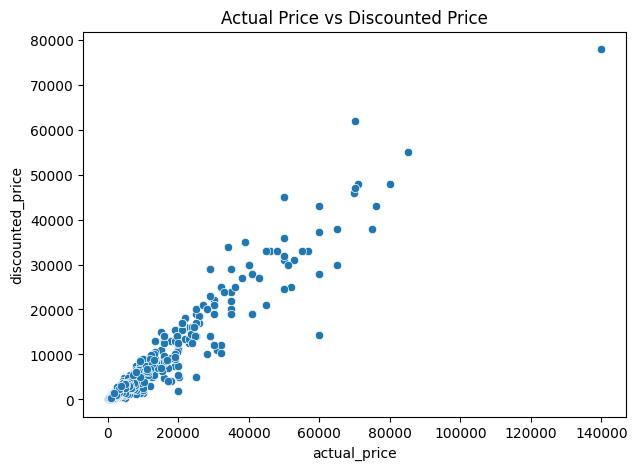

In [22]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='actual_price', y='discounted_price')
plt.title("Actual Price vs Discounted Price")
plt.show()


## Key Insights

- Most products belong to a limited number of categories.
- Higher discounts do not always result in higher ratings.
- Some products receive high ratings despite low discount percentages.
- Top reviewed products significantly influence customer perception.
- Discounted price is strongly correlated with actual price.


## Conclusion

This analysis highlights customer preferences, pricing strategies,
and the impact of discounts and reviews on product performance.
These insights can help optimize pricing and improve product visibility.
